# Module 12 Challenge

## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

##### Create a Beautiful Soup object and use it to scrape the data in the HTML table.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup_html = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_headers = soup_html.find_all('th')
table_rows = soup_html.find_all('tr', class_='data-row')


### Step 3: Store the Data

##### Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

##### id: the identification number of a single transmission from the Curiosity rover
##### terrestrial_date: the date on Earth
##### sol: the number of elapsed sols (Martian days) since Curiosity landed on Mars
##### ls: the solar longitude
##### month: the Martian month
##### min_temp: the minimum temperature, in Celsius, of a single Martian day (sol)
##### pressure: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list for rows

rows_list = []

# Loop through the scraped data to create a list of rows
for row in table_rows:
    row_t = row.find_all('td')
    row_t1 = [td.text.strip() for td in row_t]
    rows_list.append(row_t1)
    

In [7]:
rows_list

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [8]:
# Create an empty list for headers
headers_list = []

# Loop through the scraped data to create a list of headers
for header in table_headers:
    header_t = header.text.strip()
    headers_list.append(header_t)

In [9]:
headers_list

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
table_df = pd.DataFrame(rows_list, columns=headers_list)


In [11]:
# Confirm DataFrame was created successfully
table_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis
##### Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate datetime, int, or float data types.

In [12]:
# Examine data type of each column
table_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [13]:
# Change data types for data analysis

convert_dict = {'id': str,
                'terrestrial_date': str,
                'sol': int,
                'ls': int,
                'month': int,
                'min_temp': float,
                'pressure': float
                }
table_df = table_df.astype(convert_dict)

In [14]:
table_df[['terrestrial_date']] = table_df[['terrestrial_date']].astype('datetime64[ns]')

In [15]:
# Confirm type changes were successful by examining data types again
table_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

## Step 5: Analyze the Data

##### 1. There are 12 months on Mars, which we can see from the cell below.
##### 2. There are 1867 Martian (and not Earth) days worth of data in the scraped dataset.
##### 3. The coldest month on Mars is the third month (-83.307292), and the wormest month is the eighth month (-68.382979), at the location of Curiosity. The overall temperature on Mars is very low compared to the Earth average temperature.
##### 4. The ninth month on Mars has the highest pressure (913.305970), and the sixth month has the lowest pressure (745.054422)
##### 5. From the last plot it is visible that there were about 3  Martial cycles in the dataset. From one peak to another is approximately 675 days (1425-748), Martian year seems to be about 677 days long. According to Google, a Mars year is 687 Earth days , which is very close to the number seen on the chart.

In [16]:
# 1. How many months are there on Mars?
table_month = table_df.groupby('month')

table_month['month'].count()


month
1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: month, dtype: int64

In [17]:
# 2. How many Martian days' worth of data are there?
table_days = table_df.groupby('terrestrial_date')
len(table_days)

1867

In [24]:
# 3. What is the average low temperature by month?
ave_low = table_df.groupby('month')
ave_low_1 = ave_low['min_temp'].mean()
ave_low_1

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

Text(0, 0.5, 'Temperature in Celsius')

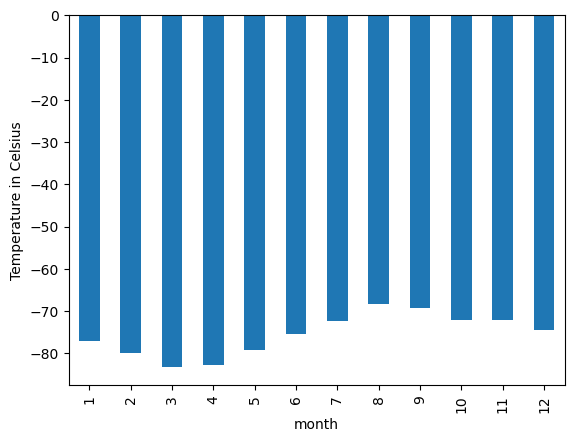

In [26]:
# Plot the average temperature by month
ave_chart = ave_low_1.plot.bar()

ave_chart.set_ylabel('Temperature in Celsius')


In [40]:
# Making a DataFrame

ave_df = pd.DataFrame(ave_low_1)
ave_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


In [38]:
# Identify the coldest and hottest months in Curiosity's location
ave_df_1 = ave_df.sort_values(by='min_temp')


,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


Text(0, 0.5, 'Temperature in Celsius')

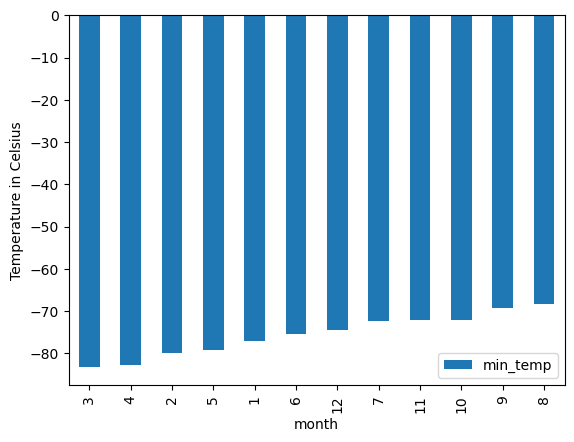

In [42]:
ave_chart_1 = ave_df_1.plot.bar()
ave_chart_1.set_ylabel('Temperature in Celsius')

In [46]:
# 4. Average pressure by Martian month
ave_pres = table_df.groupby('month')
ave_pres_1 = ave_pres['pressure'].mean()
ave_pres_1

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

In [50]:
pres_df = pd.DataFrame(ave_pres_1)
pres_df_1 = pres_df.sort_values(by='pressure')
pres_df_1

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


Text(0, 0.5, 'Atmospheric Pressure')

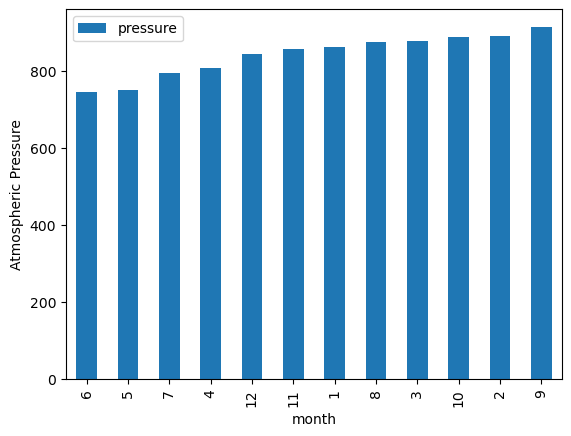

In [51]:
# Plot the average pressure by month
ave_pres_chart = pres_df_1.plot.bar()

ave_pres_chart.set_ylabel('Atmospheric Pressure')

In [53]:
# 5. How many terrestrial (earth) days are there in a Martian year?
sol_data = table_df.sort_values('sol')
sol_data

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


Text(0.5, 0, 'Number of terrestrial days')

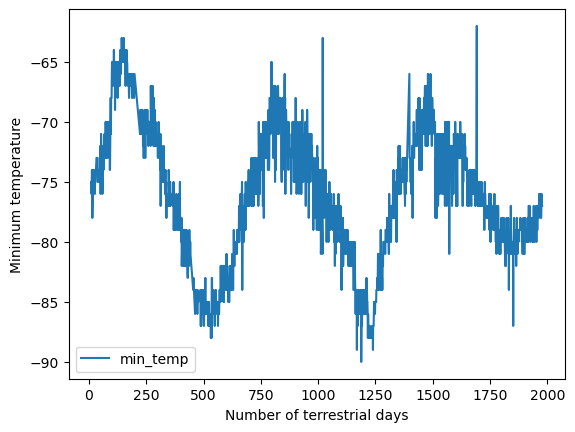

In [61]:
sol_chart = sol_data.plot(x='sol', y='min_temp')
sol_chart.set_ylabel('Minimum temperature')
sol_chart.set_xlabel('Number of terrestrial days')

### Step 6: Save the Data
##### Export the DataFrame to a CSV file.

In [63]:
# Write the data to a CSV
table_df.to_csv('table_df.csv')

In [64]:
browser.quit()